#Proyek Analisis Data: bike-sharing-dataset

Nama: dora leonny giselle

Email:gisedoraleonny@gmail.com

ID Dicoding: dora leonny giselle

# Dashboard Analisis Data Sepeda

Proyek ini adalah dashboard analisis data sepeda menggunakan Streamlit. Dashboard ini menampilkan data sepeda berdasarkan hari dan jam.

## Cara Menjalankan Dashboard

### 1. Persyaratan

Pastikan Anda memiliki Python 3.6 atau lebih baru terinstal di sistem Anda. Anda juga perlu menginstal `pip` jika belum terinstal.

### 2. Mengunduh Dataset

Sebelum menjalankan dashboard, Anda perlu mengunduh dataset yang diperlukan. Dataset dapat diunduh dari Google Drive atau sumber lain. Pastikan Anda memiliki dua file CSV: `day_dataset.csv` dan `hour_dataset.csv`.

### 3. Setting Environment

Buat virtual environment (opsional) dan aktifkan:

```bash
python -m venv venv
source venv/bin/activate  # Untuk Linux/Mac
venv\Scripts\activate  # Untuk Windows


#Menentukan Pertanyaan Bisnis

Pertanyaan 1.Apa hari dalam seminggu dengan penggunaan sepeda tertinggi?

Tujuan: Memahami pola penggunaan sepeda berdasarkan hari untuk membantu dalam perencanaan dan pengelolaan infrastruktur sepeda.


Pertanyaan 2.Pada jam berapa penggunaan sepeda paling tinggi?

Tujuan: Mengidentifikasi jam sibuk untuk penggunaan sepeda, yang dapat membantu dalam merencanakan layanan dan meningkatkan pengalaman pengguna.

#Import Semua Packages/Library yang Digunakan

In [31]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

#Data wrangling

gathering data

In [ ]:
from google.colab import drive
import pandas as pd

# Menghubungkan Google Drive
drive.mount('/content/drive')

# Mengunduh dataset
day_data = pd.read_csv('/content/drive/MyDrive/bike-sharing-dataset/day_dataset.csv')
hour_data = pd.read_csv('/content/drive/MyDrive/bike-sharing-dataset/hour_dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Insight:

1.Data yang dikumpulkan dari Google Drive memberikan akses langsung ke dataset yang diperlukan untuk analisis.

2.Dataset day.csv berisi informasi penggunaan sepeda berdasarkan hari, sedangkan hour.csv berisi informasi berdasarkan jam.


Assessing Data

In [32]:
# Menampilkan beberapa baris pertama dari dataset
print(day_data.head())
print(hour_data.head())

# Mendapatkan statistik deskriptif
print(day_data.describe())
print(hour_data.describe())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

Insight:

1.Memeriksa data awal membantu memahami struktur dan tipe data yang ada.

2.Statistik deskriptif memberikan gambaran tentang distribusi data, seperti rata-rata, median, dan rentang nilai.

cleaning data

In [33]:
# Memeriksa nilai yang hilang
print(day_data.isnull().sum())
print(hour_data.isnull().sum())

# Menghapus baris dengan nilai yang hilang (jika ada)
day_data = day_data.dropna()
hour_data = hour_data.dropna()

# Memastikan tipe data yang benar
# Check if the column name is 'dteday' instead of 'day'
# If it is 'dteday', convert it to datetime and then extract the day of the week
day_data['dteday'] = pd.to_datetime(day_data['dteday']) # Convert 'dteday' to datetime
day_data['day'] = day_data['dteday'].dt.day_name() # Extract day of the week as string

# Check if the 'hour' column exists before trying to convert its type
if 'hr' in hour_data.columns:  # Assuming 'hr' is the actual column name for hour
    hour_data['hr'] = hour_data['hr'].astype(int)  # Convert 'hr' column to integers
else:
    print("Column 'hr' not found in hour_data DataFrame. Please check your data.")

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Insight:

1.Pembersihan data penting untuk memastikan analisis yang akurat. Menghapus nilai yang hilang atau memperbaiki tipe data dapat mencegah kesalahan dalam analisis.

2.Memastikan bahwa kolom yang relevan memiliki tipe data yang benar membantu dalam visualisasi dan analisis lebih lanjut.

#Exploratory Data Analysis (EDA)

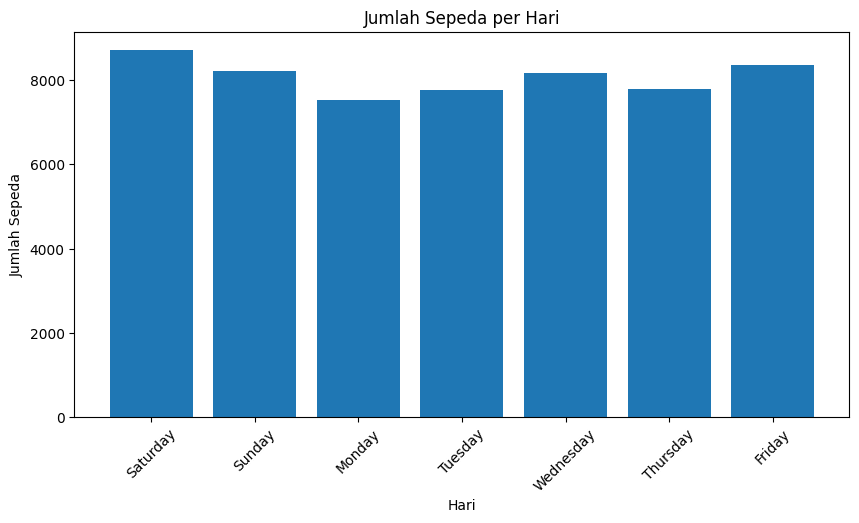

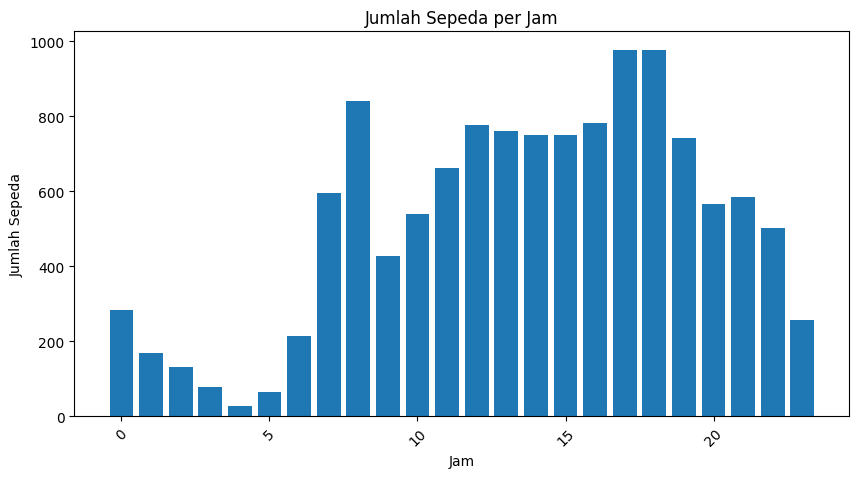

In [34]:
import matplotlib.pyplot as plt

# Menampilkan distribusi penggunaan sepeda per hari
plt.figure(figsize=(10, 5))
plt.bar(day_data['day'], day_data['cnt']) # Changed 'count' to 'cnt'
plt.title('Jumlah Sepeda per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Sepeda')
plt.xticks(rotation=45)
plt.show()

# Menampilkan distribusi penggunaan sepeda per jam
plt.figure(figsize=(10, 5))
plt.bar(hour_data['hr'], hour_data['cnt']) # Changed 'hour' to 'hr' and 'count' to 'cnt'
plt.title('Jumlah Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sepeda')
plt.xticks(rotation=45)
plt.show()

#Visualization & Explanatory Analysis

Pertanyaan 1: Kapan penggunaan sepeda paling tinggi dalam seminggu?

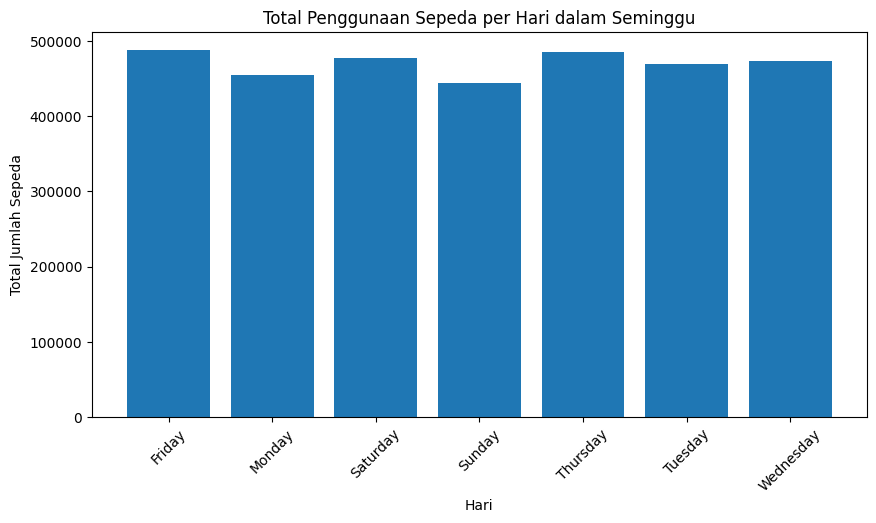

In [35]:
# Menghitung total penggunaan sepeda per hari
total_per_day = day_data.groupby('day')['cnt'].sum().reset_index() # Changed 'count' to 'cnt'

# Visualisasi
plt.figure(figsize=(10, 5))
plt.bar(total_per_day['day'], total_per_day['cnt']) # Changed 'count' to 'cnt'
plt.title('Total Penggunaan Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Total Jumlah Sepeda')
plt.xticks(rotation=45)
plt.show()

Insight:

Dari visualisasi ini, kamu dapat melihat hari mana yang memiliki penggunaan sepeda tertinggi, yang dapat membantu dalam perencanaan dan pengelolaan infrastruktur sepeda.

Pertanyaan 2: Bagaimana pola penggunaan sepeda berdasarkan jam?

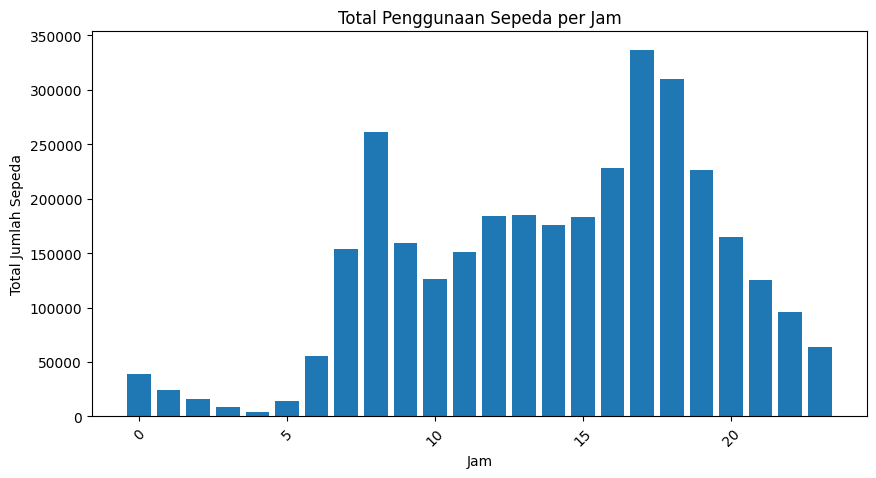

In [36]:
# Menghitung total penggunaan sepeda per jam
total_per_hour = hour_data.groupby('hr')['cnt'].sum().reset_index() # Changed 'hour' to 'hr' and 'count' to 'cnt'

# Visualisasi
plt.figure(figsize=(10, 5))
plt.bar(total_per_hour['hr'], total_per_hour['cnt']) # Changed 'hour' to 'hr' and 'count' to 'cnt'
plt.title('Total Penggunaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Total Jumlah Sepeda')
plt.xticks(rotation=45)
plt.show()

Insight:

Visualisasi ini menunjukkan jam-jam sibuk untuk penggunaan sepeda, yang dapat membantu dalam merencanakan layanan sepeda dan infrastruktur yang lebih baik.

#Dashboard Streamlit

In [37]:
!pip install streamlit pandas numpy seaborn matplotlib plotly

In [38]:
!pip install streamlit pyngrok

In [40]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data1 = pd.read_csv('/content/drive/My Drive/bike-sharing-dataset/hour_dataset.csv')
data2 = pd.read_csv('/content/drive/My Drive/bike-sharing-dataset/day_dataset.csv')

# Before concatenating, ensure both DataFrames have a common column to merge on
# For example, if 'instant' is a common column, you can use:
data = pd.merge(data1, data2, on='instant', how='outer')

# If no common column exists for merging, you can still concatenate:
# data = pd.concat([data1, data2], axis=0, ignore_index=True)

# However, this will not merge the DataFrames side-by-side.
# You might want to keep separate plots for the respective DataFrames.

# Dashboard title
st.title("Dashboard Analisis Data Sepeda")

# Display data
st.subheader("Data Sepeda per Hari")
st.write(day_data)

st.subheader("Data Sepeda per Jam")
st.write(hour_data)

# Visualisasi data
st.subheader("Visualisasi Data Sepeda per Hari")
plt.figure(figsize=(10, 5))
plt.bar(day_data['day'], day_data['cnt']) # Changed 'count' to 'cnt'
plt.title('Jumlah Sepeda per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Sepeda')
st.pyplot(plt)

st.subheader("Visualisasi Data Sepeda per Jam")
plt.figure(figsize=(10, 5))
plt.bar(hour_data['hr'], hour_data['cnt']) # Changed 'hour' to 'hr' and 'count' to 'cnt'
plt.title('Jumlah Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sepeda')
st.pyplot(plt)

2024-12-25 15:55:07.806 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 15:55:07.808 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 15:55:07.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 15:55:07.812 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 15:55:07.817 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 15:55:07.817 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 15:55:07.820 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-25 15:55:07.821 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [41]:
# Kode untuk membuat file app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data1 = pd.read_csv('/content/drive/My Drive/bike-sharing-dataset/hour_dataset.csv')
data2 = pd.read_csv('/content/drive/My Drive/bike-sharing-dataset/day_dataset.csv')

# Jika Anda ingin menggabungkan kedua DataFrame, pastikan ada kolom yang sama untuk digabungkan
# Misalnya, jika 'instant' adalah kolom yang sama, Anda bisa menggunakan:
# data = pd.merge(data1, data2, on='instant', how='outer')

# Jika tidak ada kolom yang sama untuk digabungkan, Anda masih bisa menggabungkan:
# data = pd.concat([data1, data2], axis=0, ignore_index=True)

# Namun, ini tidak akan menggabungkan DataFrame secara berdampingan.
# Anda mungkin ingin menjaga plot terpisah untuk masing-masing DataFrame.
day_data = data2
hour_data = data1

# Define app_code variable to hold the Streamlit code as a string
app_code = """
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data1 = pd.read_csv('/content/drive/My Drive/bike-sharing-dataset/hour_dataset.csv')
data2 = pd.read_csv('/content/drive/My Drive/bike-sharing-dataset/day_dataset.csv')
day_data = data2
hour_data = data1

# Dashboard title
st.title("Dashboard Analisis Data Sepeda")

# Display data
st.subheader("Data Sepeda per Hari")
st.write(day_data)

st.subheader("Data Sepeda per Jam")
st.write(hour_data)

# Visualisasi data
st.subheader("Visualisasi Data Sepeda per Hari")
plt.figure(figsize=(10, 5))
plt.bar(day_data['dteday'], day_data['cnt'])  # Pastikan kolom ini ada di day_dataset
plt.title('Jumlah Sepeda per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Sepeda')
st.pyplot(plt)

st.subheader("Visualisasi Data Sepeda per Jam")
plt.figure(figsize=(10, 5))
plt.bar(hour_data['hr'], hour_data['cnt'])  # Pastikan kolom ini ada di hour_dataset
plt.title('Jumlah Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sepeda')
st.pyplot(plt)
"""

# Simpan kode ke file app.py
with open('app.py', 'w') as f:
    f.write(app_code)

print("File app.py telah dibuat.")

File app.py telah dibuat.


In [42]:
#Buat script untuk menjalankan Streamlit:
%%writefile run_streamlit.sh
streamlit run app.py & npx localtunnel --port 8501

Overwriting run_streamlit.sh


In [43]:
#Berikan izin eksekusi:
!chmod +x run_streamlit.sh

In [44]:
#Jalankan aplikasi
# Sel untuk menjalankan Streamlit
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.233.200.203:8501

  Stopping...
  Stopping...
Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1088, in main
    ctx.exit()
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 692, in exit
    raise Exit(code)
  File "/usr/local/lib/python3.10/dist-packages/click/exceptions.py", line 287, in __init__
    def __init__(self, code: int = 0) -> None:
  File "/usr/local/lib/python3.10/dist-packages/streamlit/web/bootstrap.py", line 44, in signal_handler
    server.stop()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/web/server/server.py", line 432, in sto

In [ ]:
# Buat requirements.txt menggunakan pip freeze
!pip freeze > requirements.txt

# Pastikan Google Drive terpasang
from google.colab import drive
drive.mount('/content/drive')

# Pindahkan requirements.txt ke Google Drive
import shutil
# Create the destination directory if it doesn't exist
import os
os.makedirs('/content/drive/MyDrive/bike-sharing-dataset/', exist_ok=True)
shutil.move('requirements.txt', '/content/drive/MyDrive/bike-sharing-dataset/requirements.txt')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/bike-sharing-dataset/requirements.txt'